In [1]:
import geopandas as gpd
gpd.__version__

'1.1.2'

In [2]:
from shapely import Point, MultiPoint, LineString, MultiLineString, Polygon, MultiPolygon 

In [10]:
point1 = Point(1,0)

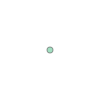

In [19]:
point1

In [11]:
line1 = LineString([
    (1,0), (5,8), (10,100)
])

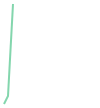

In [18]:
line1

In [20]:
print(line1)

LINESTRING (1 0, 5 8, 10 100)


In [26]:
line1.length

101.08004129409883

In [3]:
polygon1 = Polygon([
    (0,0), (1,0), (1,1)
])

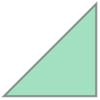

In [22]:
polygon1

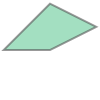

In [4]:
polygon2 = Polygon([
    (0,0), (1,0), (2,0.5) ,(1,1)
])
polygon2

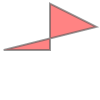

In [5]:
polygon3 = Polygon([
    (0,0), (1,0), (1,1), (2,0.5)
])
polygon3

### The sequence of points is important

In [5]:
polygon1.area

0.5

In [7]:
polygon1.length

3.414213562373095

In [6]:
multi_shape = MultiPolygon([polygon1,polygon2,polygon3])

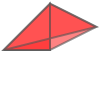

In [7]:
multi_shape

### Buffering

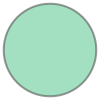

In [12]:
point1_buffer1m = point1.buffer(distance= 1)
point1_buffer1m

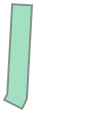

In [17]:
line1.buffer(distance = 10, cap_style="flat")

In [20]:
square = Polygon([
    (0,0), (1,0), (1,1), (0,1)
])
square.area

1.0

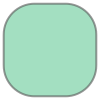

In [22]:
square.buffer(distance= 1, cap_style="flat")

### Get the Centroid

In [24]:
print(square.centroid)

POINT (0.5 0.5)


### Convex hull means the minimum extent window for objects

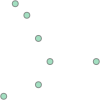

In [25]:
points = MultiPoint([
    (1,0), (3,7),(4,5), (2,8),(4,1), (5,3),(9,3)
])
points

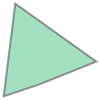

In [26]:
points.convex_hull

### Union, intersect, Erase

In [28]:
circle1 = Point((0,0)).buffer(2)
circle2 = Point((2,0)).buffer(2)

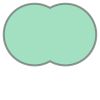

In [29]:
circle1.union(circle2)

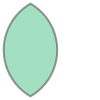

In [31]:
circle1.intersection(circle2)

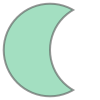

In [32]:
circle1.difference(circle2)

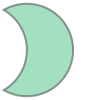

In [33]:
circle2.difference(circle1)

### True False questions

In [37]:
point1 = Point((3,0))
print(point1.within(circle1))
print(
    point1.intersects(circle2)
)


False
True


In [8]:
### Get data from Arcgis pro
railways = gpd.read_file(r"C:\Users\sinan\OneDrive\Documents\ArcGIS\Projects\hamburg\hamburg.gdb", layer= "gis_osm_railways_free_1")

In [9]:
railways.head(3)

,osm_id,code,fclass,name,layer,bridge,tunnel,Shape_Length,geometry
0,2588600,6102,light_rail,,0.0,F,F,869.372735,"MULTILINESTRING ((557065.357 5925321.027, 5571..."
1,2703995,6101,rail,Hafenbahn,0.0,F,F,743.575028,"MULTILINESTRING ((559972.116 5925192.87, 55990..."
2,4221091,6101,rail,Vogelfluglinie,1.0,T,F,25.225384,"MULTILINESTRING ((568715.339 5935161.944, 5687..."


In [12]:
railways["geometry_buffer"] = railways["geometry"].buffer(2)

In [16]:
railways["area"] = railways["geometry_buffer"].area
railways["length"] = railways["geometry"].length

In [17]:
railways.head()

,osm_id,code,fclass,name,layer,bridge,tunnel,Shape_Length,geometry,area,geometry_buffer,length
0,2588600,6102,light_rail,,0.0,F,F,869.372735,"MULTILINESTRING ((557065.357 5925321.027, 5571...",3490.037107,"POLYGON ((557175.193 5925317.495, 557278.425 5...",869.372735
1,2703995,6101,rail,Hafenbahn,0.0,F,F,743.575028,"MULTILINESTRING ((559972.116 5925192.87, 55990...",2986.838379,"POLYGON ((559906.788 5925194.096, 559906.784 5...",743.575028
2,4221091,6101,rail,Vogelfluglinie,1.0,T,F,25.225384,"MULTILINESTRING ((568715.339 5935161.944, 5687...",113.447728,"POLYGON ((568735.128 5935177.715, 568735.296 5...",25.225384
3,4389117,6101,rail,Hafenbahn,0.0,F,F,819.218616,"MULTILINESTRING ((559596.151 5925741.048, 5596...",3289.420569,"POLYGON ((559598.921 5925768.193, 559598.922 5...",819.218616
4,4389118,6101,rail,Hafenbahn,1.0,T,F,33.001629,"MULTILINESTRING ((559590.753 5925708.491, 5595...",144.552710,"POLYGON ((559594.178 5925741.375, 559594.219 5...",33.001629


<Axes: >

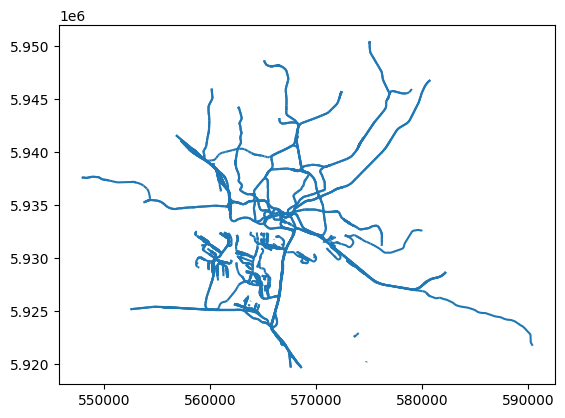

In [18]:
railways.plot()

### Improve the visualization

In [9]:
import matplotlib.pyplot as plt

<Axes: >

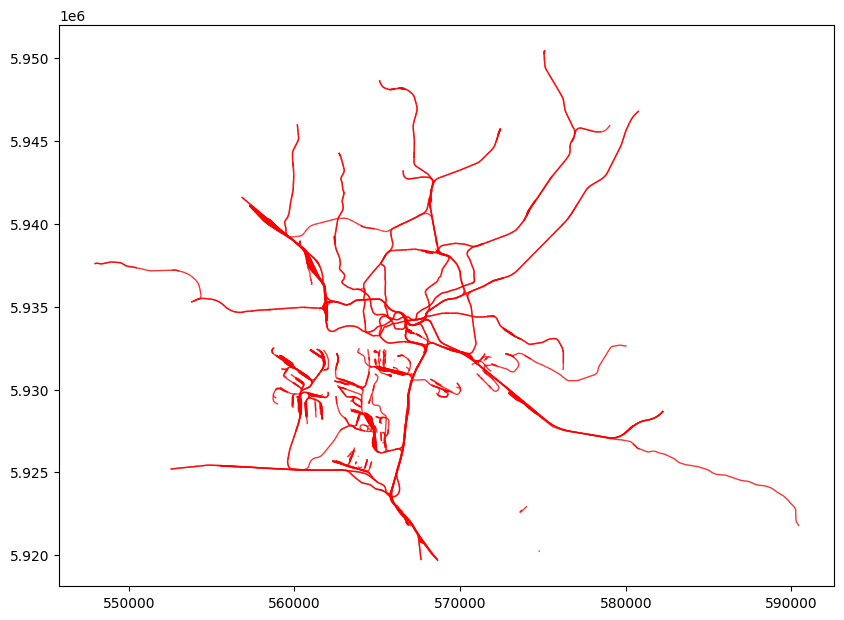

In [28]:
f, ax = plt.subplots(1,1,figsize = (10,10))
railways.plot(ax = ax,
              color= "red",
              edgecolor= "blue",
              linewidth= 1,
              alpha = 0.8)

<Axes: >

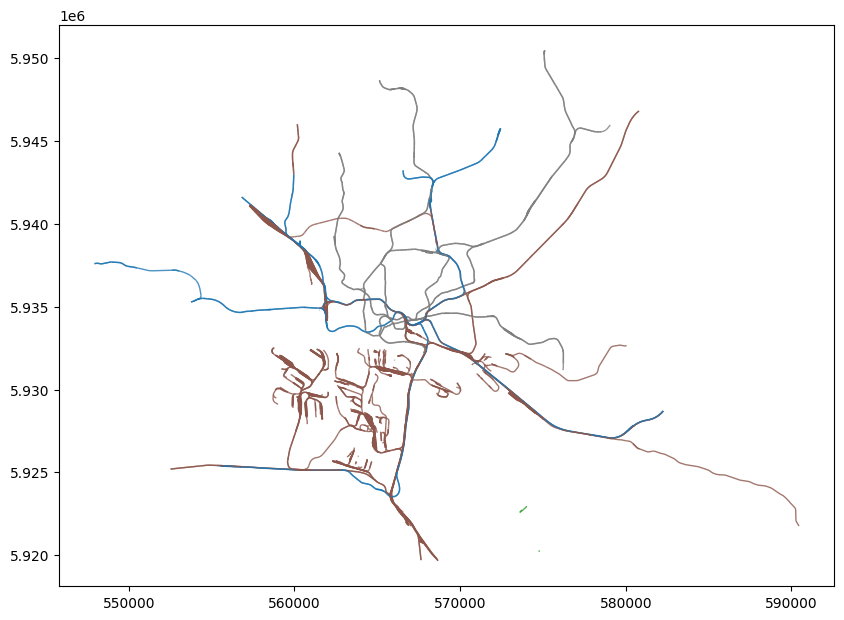

In [ ]:
### Each class has a different color
f, ax = plt.subplots(1,1,figsize = (10,10))
railways.plot(ax = ax,
              column= "fclass",
              linewidth= 1,
              alpha = 0.8)

<Axes: >

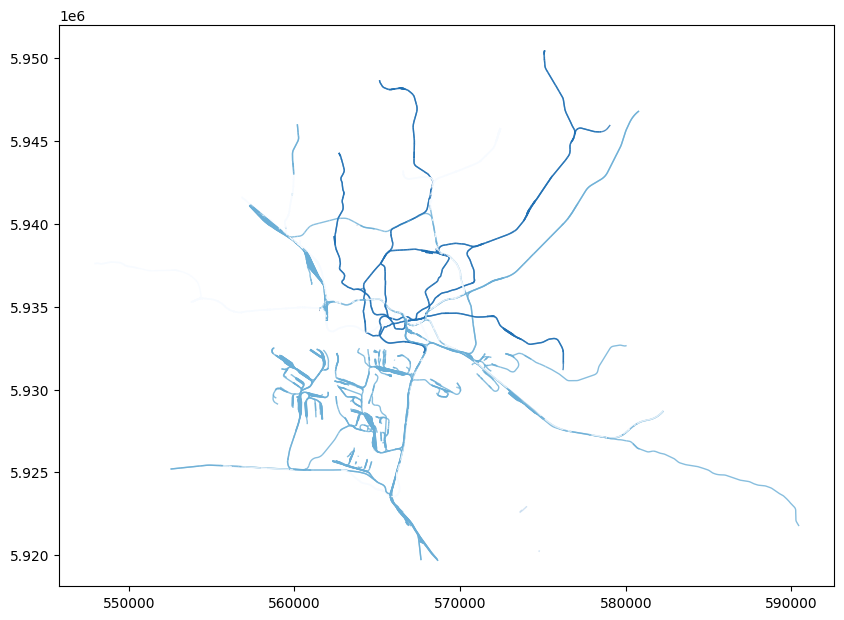

In [ ]:
### The color of each class selected in a specific colormap
f, ax = plt.subplots(1,1,figsize = (10,10))
railways.plot(ax = ax,
              column= "fclass",
              cmap = "Blues",
              linewidth= 1,
              alpha = 0.8)

In [3]:
landuse = gpd.read_file(r"C:\Users\sinan\OneDrive\Documents\ArcGIS\Projects\hamburg\schleswig-holstein-251227-free.shp\gis_osm_landuse_a_free_1.shx")

In [4]:
### if we want to add shape.Length or shape.area we must take care of coordinate sys
landuse.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
landuse.to_crs("EPSG:25832", inplace= True)

In [6]:
landuse.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Denmark - onshore and offshore; Germany - onshore and offshore; Italy - onshore and offshore; Norway including Svalbard - onshore and offshore; Spain - offshore.
- bounds: (6.0, 36.53, 12.01, 84.01)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
landuse["length"] = landuse["geometry"].length
landuse["area"] = landuse["geometry"].area

landuse.head()

,osm_id,code,fclass,name,geometry,length,area
0,4042479,7211,recreation_ground,Freibad Quickborn,"POLYGON ((559414.187 5954118.765, 559416.151 5...",475.602276,13439.241485
1,4045581,7204,industrial,None,"POLYGON ((573809.708 6025139.617, 573879.944 6...",1213.184928,42757.874019
2,4045583,7202,park,Schleusenwiese,"POLYGON ((573926.343 6025299.051, 573934.371 6...",690.949491,10423.762057
3,4045587,7204,industrial,Schleuseninsel,"POLYGON ((573942.125 6024980.818, 573941.801 6...",1913.102747,95072.028091
4,4049469,7201,forest,None,"POLYGON ((561169.068 5953173.465, 561194.436 5...",726.343246,29212.288293


### check all the cmap() in this link (https://matplotlib.org/stable/users/explain/colors/colormaps.html)

(np.float64(312232.8666685323),
 np.float64(672548.217468512),
 np.float64(5902367.48151534),
 np.float64(6132720.8698932))

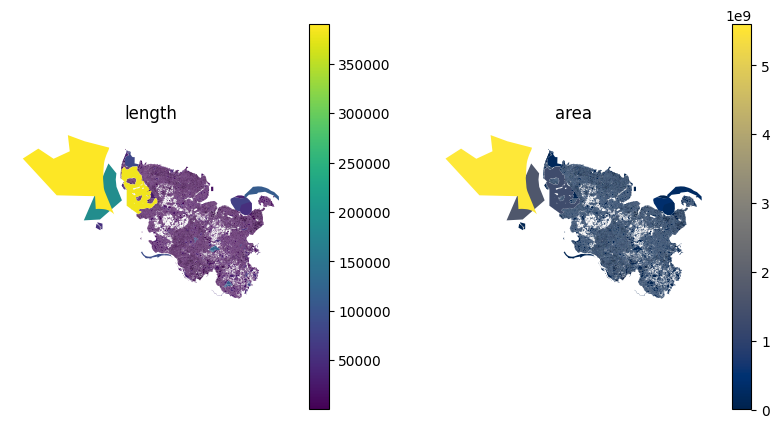

In [11]:
f, ax = plt.subplots(1,2,figsize = (10,5))

landuse.plot(ax = ax[0], column = "length", cmap = "viridis", legend = True)
landuse.plot(ax = ax[1], column = "area", cmap = "cividis", legend = True)

ax[0].set_title("length")
ax[1].set_title("area")

ax[0].axis("off")
ax[1].axis("off")

### convert Polygon to Point

In [13]:
landuse["geometry"] = landuse["geometry"].centroid
landuse.head(3)

,osm_id,code,fclass,name,geometry,length,area
0,4042479,7211,recreation_ground,Freibad Quickborn,POINT (559475.864 5954155.909),475.602276,13439.241485
1,4045581,7204,industrial,None,POINT (574066.694 6025173.228),1213.184928,42757.874019
2,4045583,7202,park,Schleusenwiese,POINT (574056.593 6025299.481),690.949491,10423.762057


<Axes: >

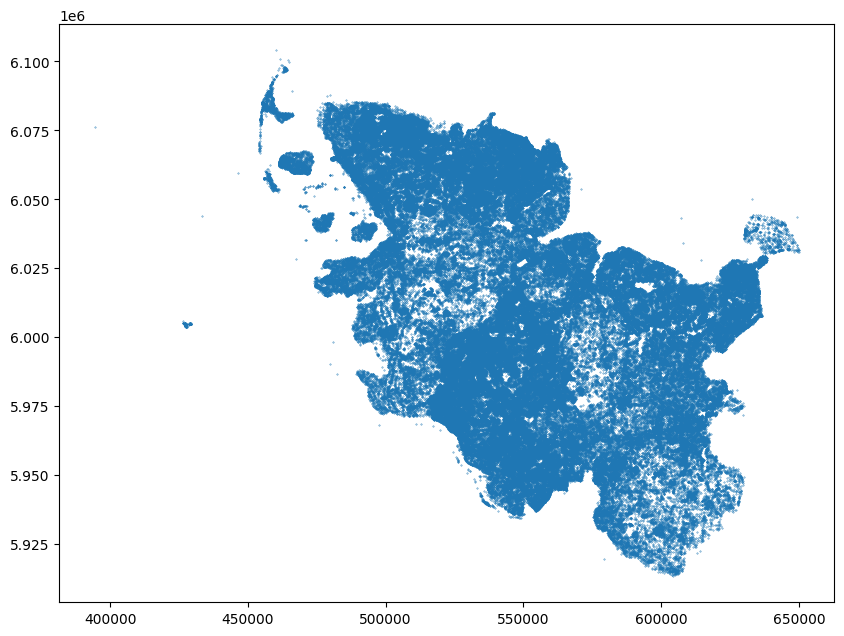

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
landuse.plot(ax = ax, markersize = 0.1)